# COVID-19 HOSPITALIZATION CLASSIFICATION MODEL

### Melissa Mullen - COMP 740 Individual Implementation Project

In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('clean_covid.csv')

In [2]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0,27,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN
1,1,1,NaN,0,56,0,0,0,0,0,1,0,0,0,1,1,1,1,NaN
2,1,1,NaN,0,34,0,0,0,0,0,0,0,0,0,0,0,1,1,NaN
3,1,1,NaN,0,34,0,0,0,0,0,0,0,0,0,0,1,0,1,NaN
4,1,1,NaN,0,49,0,1,0,0,0,0,0,0,0,0,0,1,1,NaN


## Initial Data Exploration and Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342604 entries, 0 to 342603
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  342604 non-null  int64  
 1   patient_type         342604 non-null  int64  
 2   intubed              51679 non-null   float64
 3   pneumonia            342604 non-null  int64  
 4   age                  342604 non-null  int64  
 5   pregnancy            342604 non-null  int64  
 6   diabetes             342604 non-null  int64  
 7   copd                 342604 non-null  int64  
 8   asthma               342604 non-null  int64  
 9   inmsupr              342604 non-null  int64  
 10  hypertension         342604 non-null  int64  
 11  other_disease        342604 non-null  int64  
 12  cardiovascular       342604 non-null  int64  
 13  obesity              342604 non-null  int64  
 14  renal_chronic        342604 non-null  int64  
 15  tobacco          

In [4]:
df.isnull().sum()

sex                         0
patient_type                0
intubed                290925
pneumonia                   0
age                         0
pregnancy                   0
diabetes                    0
copd                        0
asthma                      0
inmsupr                     0
hypertension                0
other_disease               0
cardiovascular              0
obesity                     0
renal_chronic               0
tobacco                     0
contact_other_covid         0
covid_res                   0
icu                    290925
dtype: int64

In [5]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,342604.000000,342604.000000,51679.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,342604.000000,51679.000000
mean,0.491454,0.849158,0.135452,0.128344,41.433378,0.006988,0.107167,0.012685,0.030245,0.012913,0.138988,0.016030,0.019901,0.158550,0.014139,0.087425,0.569453,0.402660,0.130111
std,0.499928,0.357895,0.342209,0.334472,16.379029,0.083300,0.309326,0.111912,0.171261,0.112899,0.345935,0.125592,0.139659,0.365257,0.118063,0.282457,0.495153,0.490434,0.336429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.covid_res.value_counts()

0    204651
1    137953
Name: covid_res, dtype: int64

Where we are concerned about whether somebody diagnosed with COVID-19 was hospitalized, we don't need the data with negative test results.

In [7]:
df = df.loc[(df.covid_res == 0)]
df.covid_res.value_counts()

0    204651
Name: covid_res, dtype: int64

In [8]:
df.shape

(204651, 19)

In [9]:
df.corr()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,1.000000,0.047763,-0.035819,-0.048813,-0.003838,0.083119,-0.011649,-0.005540,0.036648,0.006565,-0.004608,0.014687,-0.010306,0.020629,-0.012052,-0.109004,0.035612,NaN,-0.022184
patient_type,0.047763,1.000000,NaN,-0.658165,-0.135222,-0.027894,-0.193157,-0.133270,0.005741,-0.122657,-0.154083,-0.115577,-0.109319,-0.026901,-0.144655,-0.007157,0.217269,NaN,NaN
intubed,-0.035819,NaN,1.000000,0.183757,-0.011285,-0.033947,0.027887,0.004582,-0.019045,0.013184,0.021657,0.037558,0.033967,0.030952,0.027725,0.012232,-0.043186,NaN,0.426373
pneumonia,-0.048813,-0.658165,0.183757,1.000000,0.153433,-0.002254,0.176761,0.122024,-0.003796,0.092399,0.142059,0.085279,0.096465,0.038863,0.127198,0.009912,-0.168386,NaN,0.125373
age,-0.003838,-0.135222,-0.011285,0.153433,1.000000,-0.059379,0.299282,0.160904,-0.020797,0.025080,0.358199,0.025975,0.127494,0.096113,0.089976,0.024431,-0.055966,NaN,-0.046148
pregnancy,0.083119,-0.027894,-0.033947,-0.002254,-0.059379,1.000000,-0.019802,-0.005718,0.000945,-0.000590,-0.023653,0.021965,-0.007696,-0.013997,-0.006799,-0.018269,-0.040897,NaN,-0.017115
diabetes,-0.011649,-0.193157,0.027887,0.176761,0.299282,-0.019802,1.000000,0.105580,0.005415,0.052484,0.349759,0.038697,0.116698,0.115261,0.155987,0.019174,-0.081780,NaN,0.009097
copd,-0.005540,-0.133270,0.004582,0.122024,0.160904,-0.005718,0.105580,1.000000,0.037665,0.052070,0.122120,0.050211,0.120986,0.038673,0.077183,0.063228,-0.059035,NaN,-0.004033
asthma,0.036648,0.005741,-0.019045,-0.003796,-0.020797,0.000945,0.005415,0.037665,1.000000,0.024259,0.019294,0.016011,0.020607,0.046697,0.004616,0.010421,0.002352,NaN,-0.019329
inmsupr,0.006565,-0.122657,0.013184,0.092399,0.025080,-0.000590,0.052484,0.052070,0.024259,1.000000,0.044794,0.154920,0.066499,0.016491,0.102031,0.006184,-0.050216,NaN,0.028536


In [10]:
corr_matrix = df.corr()

corr_matrix['patient_type'].sort_values(ascending=False)

patient_type           1.000000
contact_other_covid    0.217269
sex                    0.047763
asthma                 0.005741
tobacco               -0.007157
obesity               -0.026901
pregnancy             -0.027894
cardiovascular        -0.109319
other_disease         -0.115577
inmsupr               -0.122657
copd                  -0.133270
age                   -0.135222
renal_chronic         -0.144655
hypertension          -0.154083
diabetes              -0.193157
pneumonia             -0.658165
intubed                     NaN
covid_res                   NaN
icu                         NaN
Name: patient_type, dtype: float64

## Data Visualization

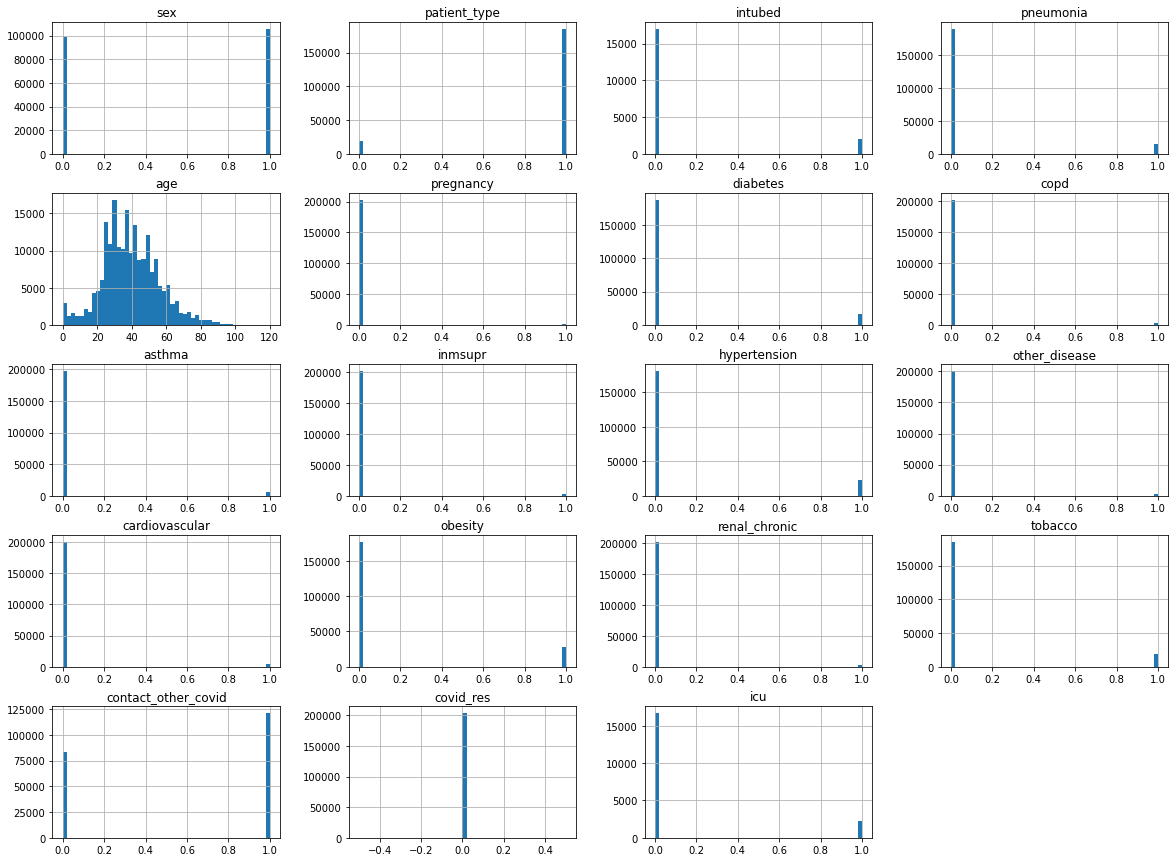

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

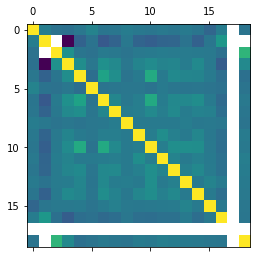

In [12]:
plt.matshow(df.corr())
plt.show()

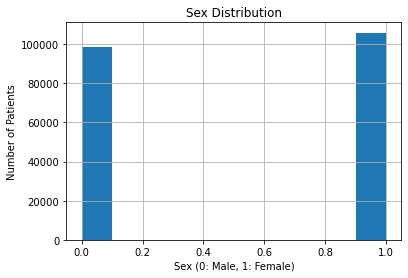

In [13]:
df.sex.hist()

plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Number of Patients')
plt.title('Sex Distribution')
 
plt.show()

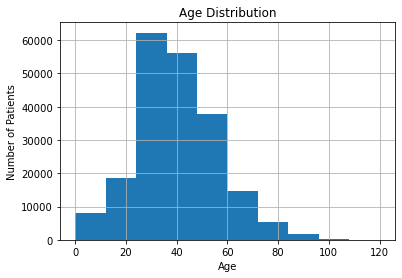

In [14]:
df.age.hist()

plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution')
 
plt.show()

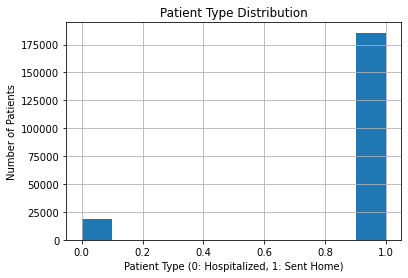

In [15]:
df.patient_type.hist()

plt.xlabel('Patient Type (0: Hospitalized, 1: Sent Home)')
plt.ylabel('Number of Patients')
plt.title('Patient Type Distribution')
 
plt.show()

## Data Preparation and Feature Engineering

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
test_set.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
255533,1,1,NaN,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
187367,1,1,NaN,0,28,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
168641,1,1,NaN,0,84,0,1,0,0,0,1,0,0,0,0,0,0,0,NaN
220182,0,1,NaN,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
289023,1,1,NaN,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN


There are missing values in the intubed and icu columns. I will handle them using SimpleImputer

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [19]:
imputer.fit(df)
imputer.statistics_

array([ 1.,  1.,  0.,  0., 38.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.])

In [20]:
# Looks good!
df.median().values

array([ 1.,  1.,  0.,  0., 38.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.])

In [21]:
X = imputer.transform(df)

In [22]:
df_tr = pd.DataFrame(X, columns=df.columns,
                          index=df.index)

In [23]:
df_tr.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
137953,0.0,1.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137954,0.0,1.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
137955,0.0,1.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
137956,1.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
137957,1.0,1.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [24]:
df_tr.isnull().sum()

sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

There are no columns that contain text or categorical data, so there is no need for OrdinalEncoder or OneHotEncoder

## Building the Pipeline